In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야함.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당.
a = get_font_family()
# 폰트설정
import matplotlib.pyplot as plt 
plt.rc("font", family = a)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

In [3]:
os.listdir("./data")

['covid_19_dataset', 'KT_빅데이터플랫폼_데이터셋', '거리데이터.csv', '외부데이터', '위치데이터.csv']

In [4]:
os.listdir("./data/KT_빅데이터플랫폼_데이터셋")

['dlvr_call.csv',
 'popl.csv',
 'StartupOrClosing_Region_ver2.csv',
 'StartupOrClosing_Shop_ver2.csv',
 '전체 데이터 설명.hwp']

In [5]:
df = pd.read_csv("./data/KT_빅데이터플랫폼_데이터셋/dlvr_call.csv")
df = df.rename(columns={'SN' : '순번',
'PROCESS_DT' : '처리일시',
'DLVR_REQUST_ENTRPS_ID' : '배달요청업체ID',
'DLVR_REQUST_STTUS_VALUE' : '배달요청상태값',
'DLVR_RCEPT_ENTRPS_ID' : '배달접수업체ID',
'DLVR_STORE_ID' : '배달상점ID',
'DLVR_STORE_INDUTY_NM' : '배달상점 업종명',
'DLVR_STORE_LEGALDONG_CODE' : '배달상점법정동코드',
'DLVR_STORE_BRTC_NM' : '배달상점광역시도명',
'DLVR_STORE_SIGNGU_NM' : '배달상점시군구명',
'DLVR_STORE_LEGALDONG_NM' : '배달상점법정동명',
'DLVR_STORE_LI_NM' : '배달상점리명',
'DLVR_STORE_ADSTRD_CODE' : '배달상점행정동코드',
'DLVR_STORE_RDNMADR_CODE' : '배달상점도로명주소 코드',
'DLVR_DSTN_LEGALDONG_CODE' : '배달목적지법정동코드',
'DLVR_DSTN_BRTC_NM' : '배달목적지광역시도명',
'DLVR_DSTN_SIGNGU_NM' : '배달목적지시군구명',
'DLVR_DSTN_LEGALDONG_NM' : '배달목적지법정동명',
'DLVR_DSTN_LI_NM' : '배달목적지 리명',
'DLVR_DSTN_ADSTRD_CODE' : '배달목적지행정동코드',
'DLVR_DSTN_RDNMADR_CODE' : '배달목적지도로명주소 코드',
'DLVR_MAN_ID' : '배달자ID',
'DLVR_AMOUNT' : '배달금액',
'CALL_RLAY_FEE_AMOUNT' : '호출중계수수료금액',
'GOODS_AMOUNT' : '상품금액',
'SETLE_KND_VALUE' : '결제종류값',
'SETLE_CARD_NM' : '결제카드명',
'DLVR_RCEPT_TIME' : '배달접수시간',
'DLVR_CARALC_TIME' : '배달배차시간',
'DLVR_RECPT_TIME' : '배달수령시간',
'DLVR_COMPT_TIME' : '배달완료시간',
'DLVR_CANCL_TIME' : '배달취소시간'})

In [6]:
# 필요없는 데이터컬럼 제거
df.drop(['배달요청상태값','배달상점법정동코드',
         '배달상점법정동명','배달상점리명','배달상점행정동코드','배달상점도로명주소 코드','결제종류값',
         '배달목적지법정동코드','배달목적지광역시도명','배달목적지시군구명','배달목적지법정동명',
         '배달목적지 리명','배달목적지행정동코드','배달목적지도로명주소 코드'], axis=1, inplace=True)

In [7]:
display(df.head())

,순번,처리일시,배달요청업체ID,배달접수업체ID,배달상점ID,배달상점 업종명,배달상점광역시도명,배달상점시군구명,배달자ID,배달금액,호출중계수수료금액,상품금액,결제카드명,배달접수시간,배달배차시간,배달수령시간,배달완료시간,배달취소시간
0,3486929,2019-12-01,C000101,C000101,S0021950,족발/보쌈,서울특별시,영등포구,D0006140,3300,200,18000,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N
1,3486930,2019-12-01,C000099,C000099,S0039210,치킨,경기도,고양시 일산동구,D0005898,2900,0,21900,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N
2,3486932,2019-12-01,C000029,C000043,S0036135,치킨,경기도,의정부시,D0000864,3500,200,19500,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N
3,3486933,2019-12-01,C000105,C000105,S0039956,돈까스/일식,경기도,고양시 일산동구,D0001526,3500,0,18000,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N
4,3486934,2019-12-01,C000028,C000043,S0003074,치킨,경기도,의정부시,D0000986,3500,200,18000,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N


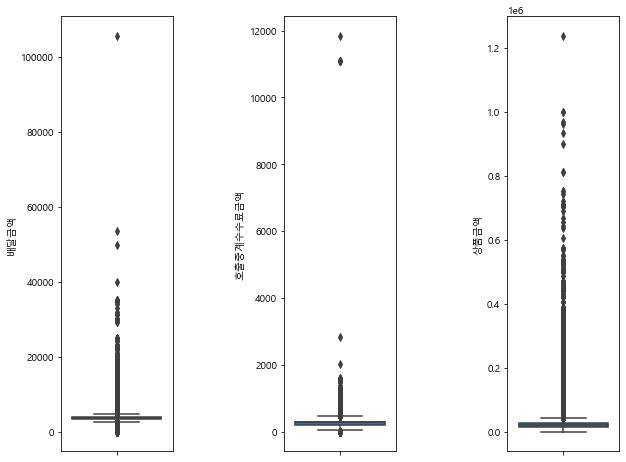

In [8]:
## 배달금액 시각화
fig, ax = plt.subplots(ncols=3, figsize=(10,8))
plt.subplots_adjust(wspace=1, hspace=0.2)
sns.boxplot(y='배달금액',data=df, ax=ax[0])
sns.boxplot(y='호출중계수수료금액',data=df, ax=ax[1])
sns.boxplot(y='상품금액',data=df, ax=ax[2])
plt.show()

In [9]:
before = len(df)
df = df[df['배달금액'] <= 6500]
df = df[df['호출중계수수료금액'] <= 400]
df = df[df['상품금액'] <= 58800]
df = df[df['상품금액'] != 0] 
after = len(df)
print("이상치 개수 :",before - after)

이상치 개수 : 514450


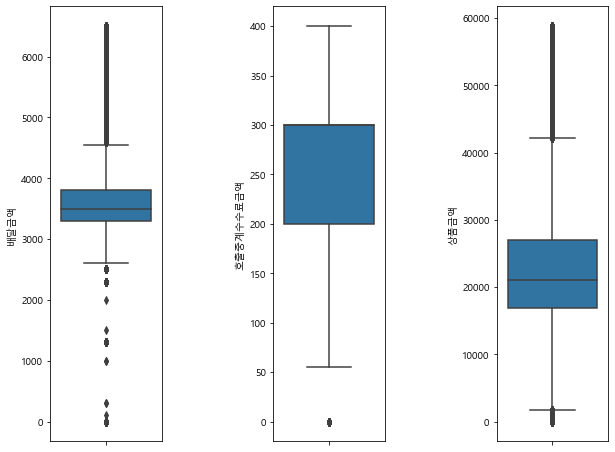

In [15]:
## 배달금액 시각화
fig, ax = plt.subplots(ncols=3, figsize=(10,8))
plt.subplots_adjust(wspace=1, hspace=0.2)
sns.boxplot(y='배달금액',data=df, ax=ax[0])
sns.boxplot(y='호출중계수수료금액',data=df, ax=ax[1])
sns.boxplot(y='상품금액',data=df, ax=ax[2])
plt.show()